<a href="https://colab.research.google.com/github/va4756/yemoon_bigdata_test/blob/main/TextMining_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Week_01

In [ ]:
import torch
import matplotlib.pyplot as plt

In [ ]:
torch.tensor([1, 2, 3])

tensor([1, 2, 3])

In [ ]:
torch.tensor([1,2,3]) + torch.tensor([2,2,2])

tensor([3, 4, 5])

In [ ]:
torch.tensor([1,2,3]) + 2

tensor([3, 4, 5])

In [ ]:
torch.tensor([[1,2], [3,4,],[5,6]])

tensor([[1, 2],
        [3, 4],
        [5, 6]])

In [ ]:
torch.tensor([[1,2]])

tensor([[1, 2]])

In [ ]:
torch.tensor([[1,2],[3,4],[5,6]]) - 1

tensor([[0, 1],
        [2, 3],
        [4, 5]])

In [ ]:
torch.tensor([[1,2], [3,4], [5,6]]) + torch.tensor([[-1], [-3], [-5]])

tensor([[0, 1],
        [0, 1],
        [0, 1]])

In [ ]:
torch.tensor([[1,2], [3,4], [5,6]]) + torch.tensor([[-1,-2]])

tensor([[0, 0],
        [2, 2],
        [4, 4]])

In [ ]:
torch.tensor([[1,2], [3,4], [5,6]]) @ torch.tensor([[1], [2]])

tensor([[ 5],
        [11],
        [17]])

In [ ]:
torch.tensor([[1,2,3]]) @ torch.tensor([[1,2], [3,4], [5,6]])

tensor([[22, 28]])

In [ ]:
torch.tensor([[1,2],[3,4], [5,6]]) @ torch.tensor([1,2])

tensor([ 5, 11, 17])

In [ ]:
torch.tensor([[1,2],[3,4]]).T

tensor([[1, 3],
        [2, 4]])

In [ ]:
torch.tensor([[1,2],[3,4],[5,6]]).reshape(6,1)

tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6]])

In [ ]:
torch.tensor([[1,2],[3,4],[5,6]]).reshape(1,6)

tensor([[1, 2, 3, 4, 5, 6]])

In [ ]:
torch.tensor([[1,2],[3,4],[5,6]]).reshape(2,-1)

tensor([[1, 2, 3],
        [4, 5, 6]])

In [ ]:
torch.tensor([[1,2],[3,4],[5,6]]).reshape(6,-1)

tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6]])

In [ ]:
a= torch.tensor([[1],[3],[5]])
b = torch.tensor([[2],[4],[6]])
torch.concat([a, b], axis=1)

tensor([[1, 2],
        [3, 4],
        [5, 6]])

In [ ]:
a= torch.tensor([[1],[3],[5]])
b = torch.tensor([[2],[4],[6]])
torch.stack([a, b], axis=1)

tensor([[[1],
         [2]],

        [[3],
         [4]],

        [[5],
         [6]]])

### 01Week 2-1 회귀모형

In [ ]:
import torch
import matplotlib.pyplot as plt

In [ ]:
plt.rcParams['figure.figsize'] = (4.5, 3.0)

In [ ]:
temp = [-2.4821, -2.3621, -1.9973, -1.6239, -1.4792, -1.4635, -1.4509, -1.4435,
        -1.3722, -1.3079, -1.1904, -1.1092, -1.1054, -1.0875, -0.9469, -0.9319,
        -0.8643, -0.7858, -0.7549, -0.7421, -0.6948, -0.6103, -0.5830, -0.5621,
        -0.5506, -0.5058, -0.4806, -0.4738, -0.4710, -0.4676, -0.3874, -0.3719,
        -0.3688, -0.3159, -0.2775, -0.2772, -0.2734, -0.2721, -0.2668, -0.2155,
        -0.2000, -0.1816, -0.1708, -0.1565, -0.1448, -0.1361, -0.1057, -0.0603,
        -0.0559, -0.0214,  0.0655,  0.0684,  0.1195,  0.1420,  0.1521,  0.1568,
         0.2646,  0.2656,  0.3157,  0.3220,  0.3461,  0.3984,  0.4190,  0.5443,
         0.5579,  0.5913,  0.6148,  0.6469,  0.6469,  0.6523,  0.6674,  0.7059,
         0.7141,  0.7822,  0.8154,  0.8668,  0.9291,  0.9804,  0.9853,  0.9941,
         1.0376,  1.0393,  1.0697,  1.1024,  1.1126,  1.1532,  1.2289,  1.3403,
         1.3494,  1.4279,  1.4994,  1.5031,  1.5437,  1.6789,  2.0832,  2.2444,
         2.3935,  2.6056,  2.6057,  2.6632]

In [ ]:
sales= [-8.5420, -6.5767, -5.9496, -4.4794, -4.2516, -3.1326, -4.0239, -4.1862,
        -3.3403, -2.2027, -2.0262, -2.5619, -1.3353, -2.0466, -0.4664, -1.3513,
        -1.6472, -0.1089, -0.3071, -0.6299, -0.0438,  0.4163,  0.4166, -0.0943,
         0.2662,  0.4591,  0.8905,  0.8998,  0.6314,  1.3845,  0.8085,  1.2594,
         1.1211,  1.9232,  1.0619,  1.3552,  2.1161,  1.1437,  1.6245,  1.7639,
         1.6022,  1.7465,  0.9830,  1.7824,  2.1116,  2.8621,  2.1165,  1.5226,
         2.5572,  2.8361,  3.3956,  2.0679,  2.8140,  3.4852,  3.6059,  2.5966,
         2.8854,  3.9173,  3.6527,  4.1029,  4.3125,  3.4026,  3.2180,  4.5686,
         4.3772,  4.3075,  4.4895,  4.4827,  5.3170,  5.4987,  5.4632,  6.0328,
         5.2842,  5.0539,  5.4538,  6.0337,  5.7250,  5.7587,  6.2020,  6.5992,
         6.4621,  6.5140,  6.6846,  7.3497,  8.0909,  7.0794,  6.8667,  7.4229,
         7.2544,  7.1967,  9.5006,  9.0339,  7.4887,  9.0759, 11.0946, 10.3260,
        12.2665, 13.0983, 12.5468, 13.8340]

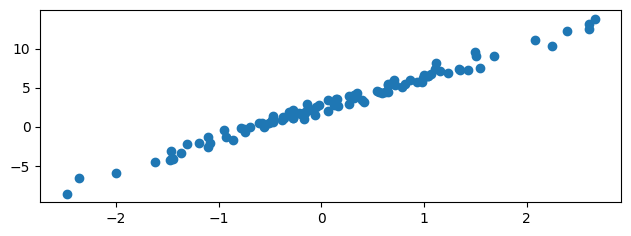

In [ ]:
plt.plot(temp, sales, 'o')

In [ ]:
torch.manual_seed(1)
x, _ = torch.randn(100).sort()
eps = torch.randn(100) * 0.5
X = torch.stack([torch.ones(100), x], axis=1)
W = torch.tensor([[2.5], [4.0]])
y = X@W + eps.reshape(100, -1)
x = X[:, [1]]

In [ ]:
What = torch.tensor([[5.0], [10.0]], requires_grad=True)
alpha = 0.001
print(f"start = {What.data.reshape(-1)}")
for epoc in range(30):
    yhat = X @ What
    loss = torch.sum((y - yhat)** 2)
    loss.backward()
    What.data = What.data - alpha * What.grad
    print(f'loss = {loss:.2f} \t 업데이트폭 = {-alpha * What.grad.reshape(-1)} \t 업데이트결과: {What.data.reshape(-1)}')
    What.grad = None

start = tensor([ 5., 10.])
loss = 3661.76 	 업데이트폭 = tensor([-0.2567, -1.0947]) 	 업데이트결과: tensor([4.7433, 8.9053])
loss = 2511.26 	 업데이트폭 = tensor([-0.2497, -0.8886]) 	 업데이트결과: tensor([4.4935, 8.0167])
loss = 1734.60 	 업데이트폭 = tensor([-0.2358, -0.7230]) 	 업데이트결과: tensor([4.2577, 7.2937])
loss = 1206.60 	 업데이트폭 = tensor([-0.2180, -0.5896]) 	 업데이트결과: tensor([4.0398, 6.7042])
loss = 845.39 	 업데이트폭 = tensor([-0.1983, -0.4818]) 	 업데이트결과: tensor([3.8415, 6.2223])
loss = 596.93 	 업데이트폭 = tensor([-0.1781, -0.3946]) 	 업데이트결과: tensor([3.6633, 5.8277])
loss = 425.21 	 업데이트폭 = tensor([-0.1585, -0.3238]) 	 업데이트결과: tensor([3.5048, 5.5040])
loss = 306.05 	 업데이트폭 = tensor([-0.1399, -0.2662]) 	 업데이트결과: tensor([3.3649, 5.2378])
loss = 223.07 	 업데이트폭 = tensor([-0.1227, -0.2192]) 	 업데이트결과: tensor([3.2422, 5.0186])
loss = 165.12 	 업데이트폭 = tensor([-0.1071, -0.1808]) 	 업데이트결과: tensor([3.1351, 4.8377])
loss = 124.55 	 업데이트폭 = tensor([-0.0930, -0.1494]) 	 업데이트결과: tensor([3.0421, 4.6883])
loss = 96.08 	 업데이트폭 = 

#### 시각화 – yhat의 관점에서!

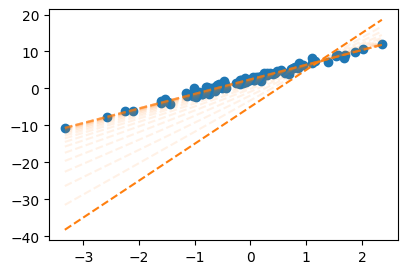

In [ ]:
What = torch.tensor([[-5.0], [10.0]], requires_grad=True)
alpha = 0.001
plt.plot(x, y, 'o', label='observed')
fig = plt.gcf()
ax = plt.gca()
ax.plot(x, X@What.data, '--', color='C1')
for epoc in range(30):
    yhat = X @ What
    loss = torch.sum((y - yhat)** 2)
    loss.backward()
    What.data = What.data - alpha * What.grad
    ax.plot(x, X@What.data, '--', color='C1', alpha=0.1)
    What.grad = None

#### 시각화 – loss의 관점에서!!

In [ ]:
import numpy as np

def plot_loss():
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    w0 = np.arange(-6, 11, 0.5)
    w1 = np.arange(-6, 11, 0.5)
    W1, W0 = np.meshgrid(w1, w0)
    LOSS = W0 * 0
    for i in range(len(w0)):
        for j in range(len(w1)):
            LOSS[i, j] = torch.sum((y - w0[i] - w1[j]*x)**2)
    ax.plot_surface(W0, W1, LOSS, rstride=1, cstride=1, color='b', alpha=0.1)
    ax.azim = 30
    ax.dist = 8
    ax.elev = 5
    ax.set_xlabel(r'$w_0$')
    ax.set_ylabel(r'$w_1$')
    ax.set_xticks([-5, 0, 5, 10])
    ax.set_yticks([-5, 0, 5, 10])
    plt.close(fig)
    return fig

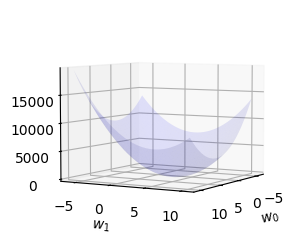

In [ ]:
plot_loss()

In [ ]:
def l(w0hat, w1hat):
    yhat = w0hat + w1hat * x
    return torch.sum(((y - yhat)**2))

/tmp/ipython-input-4059587687.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


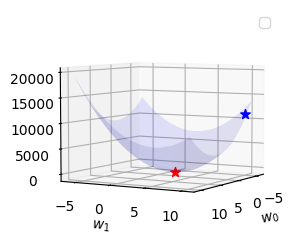

In [ ]:
fig = plot_loss()
ax = fig.gca()
ax.scatter(2.5, 4.0, l(2.5, 4.0), s=50, marker='*', color='red')
ax.scatter(-5, 10, l(-5, 10), s=50, marker='*', color='blue')
ax.legend()
fig

In [ ]:
What = torch.tensor([[-5.0], [10.0]], requires_grad=True)
aplah = 0.001
for epoc in range(30):
    yhat = X @ What
    loss = torch.sum(((y - yhat)**2))
    loss.backward()
    What.data = What.data - alpha * What.grad
    w0, w1 = What.data.reshape(-1)
    ax.scatter(w0, w1, l(w0, w1), s=5, marker='o', color='blue')
    What.grad = None

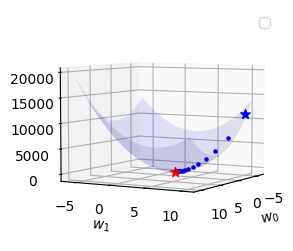

In [ ]:
fig

#### 애니메이션

In [ ]:
from matplotlib import animation
import torch
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
plt.rcParams['figure.figsize'] = (7.5, 2.5)
plt.rcParams['animation.html'] = 'jshtml'

In [ ]:
def show_animation(alpha = 0.001):
    ## 1. 히스토리 기록을 위한 list 초기화
    loss_history = []
    yhat_history = []
    What_history = []

    ## 2. 학습 + 학습과정기록
    What = torch.tensor([[-5.0], [10.0]], requires_grad=True)
    What_history.append(What.data.tolist())
    for epoc in range(30):
        yhat = X @ What ; yhat_history.append(yhat.data.tolist())
        loss = torch.sum((y - yhat)**2); loss_history.append(loss.item())
        loss.backward()
        What.data = What.data - alpha * What.grad; What_history.append(What.data.tolist())
        What.grad = None

    ## 3. 시각화
    fig = plt.figure()
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2, projection='3d')

    #### ax1: yhat의 관점에서..
    ax1.plot(x,y,'o', label=r"$(x_i, y_i)$")
    line, = ax1.plot(x, yhat_history[0], label=r"$(x_i, \hat{y}_i)$")
    ax1.legend()
    #### ax2: loss의 관점에서..
    w0 = np.arange(-6, 11, 0.5)
    w1 = np.arange(-6, 11, 0.5)
    W1, W0 = np.meshgrid(w1, w0)
    LOSS = W0 * 0
    for i in range(len(w0)):
        for j in range(len(w1)):
            LOSS[i,j] = torch.sum((y - w0[i] - w1[j]*x)**2)
    # 여기까지가 gpt 설명에 해당
    ax2.plot_surface(W0, W1, LOSS, rstride=1, cstride=1, color='b', alpha=0.001)
    ax2.azim = 30
    ax2.dist = 8
    ax2.elev = 5
    ax2.set_xlabel(r"$w_0$")
    ax2.set_ylabel(r"$w_1$")
    ax2.set_xticks([-5, 0, 5, 10])
    ax2.set_yticks([-5, 0, 5, 10])
    ax2.scatter(2.5, 4, l(2.5, 4), s=50, marker='*', color='red', label=r"${\bf W}=[2.5, 4]'$")
    ax2.scatter(-5, 10, l(-5, 10), s=50, marker='*', color='blue')
    ax2.legend()
    def animate(epoc):
        line.set_ydata(yhat_history[epoc])
        ax2.scatter(np.array(What_history)[epoc,0], np.array(What_history)[epoc,0],loss_history[epoc],color='grey')
        fig.suptitle(f"alpha = {alpha} / epoch = {epoc}")
        return line

    ani = animation.FuncAnimation(fig, animate, frames=30)
    plt.close()
    return ani

아래 코드는 **PyTorch로 간단한 선형회귀(linear regression)** 모델을 **직접 경사하강법으로 학습시키고**,
그 **학습 과정(가중치 변화, 예측값 변화, loss landscape 위 이동 경로)** 를 애니메이션처럼 시각화하기 위해 작성된 함수입니다.

---

# 🔍 코드 전체 동작 요약

* **목표:**
  ( \hat{y} = w_0 + w_1 x ) 형태의 선형 모델에서
  **가중치 (w_0, w_1)** 를 경사하강법으로 찾는 과정을 기록하고 그림으로 보여주는 함수.

* **기능:**

  1. 학습 중 발생하는 **예측값 / loss / 가중치 변화**를 기록
  2. 2D 그래프에서 **실제 데이터와 예측값 변화** 시각화
  3. 3D loss surface(손실함수 지형) 위에서 **가중치가 이동하는 경로**를 시각화

---

# ✨ 단계별 상세 설명

## 1. 학습 기록을 위한 리스트 초기화

```python
loss_history = []
yhat_history = []
What_history = []
```

각 epoch마다:

* `loss_history`: 손실값 저장 리스트
* `yhat_history`: 예측값 저장
* `What_history`: 가중치 (w_0, w_1) 저장

---

## 2. 학습 및 기록

### (1) 초기 가중치 설정

```python
What = torch.tensor([[-5.0], [10.0]], requires_grad=True)
What_history.append(What.data.tolist())
```

초기값 ( w_0 = -5, w_1 = 10 ).

### (2) 30 epoch 동안 경사하강법 수행

```python
for epoc in range(30):
    yhat = X @ What
    loss = torch.sum((y - yhat)**2)
    loss.backward()
    What.data = What.data - alpha * What.grad
    What.grad = None
```

설명:

* `yhat = X @ What`: 선형 예측 수행
* `loss = sum((y - yhat)^2)`: MSE 손실(상수 1/N 미포함)
* `loss.backward()`: 자동미분으로 grad 계산
* `What.data = ...`: 가중치 갱신 (gradient descent)
* `What.grad = None`: 다음 epoch을 위해 gradient 초기화

각 epoch마다 `yhat`, `loss`, `What` 을 각각의 history 리스트에 기록한다.

---

# 3. 시각화 준비

```python
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2, projection='3d')
```

총 2개의 plot:

* `ax1`: (x, y) 실제데이터 + 예측곡선 변화
* `ax2`: 3D loss surface + weight 변화 경로

---

### (1) ax1: 데이터와 예측값 시각화

```python
ax1.plot(x,y,'o', label=r"$(x_i, y_i)$")
line, = ax1.plot(x, yhat_history[0], label=r"$(x_i, \hat{y}_i)$")
```

* 파란 점으로 실제 데이터 시각화
* 첫 epoch의 예측선을 표시(이후 애니메이션에서 업데이트될 예정)

---

### (2) ax2: loss surface 생성

```python
w0 = np.arange(-6, 11, 0.5)
w1 = np.arange(-6, 11, 0.5)
W1, W0 = np.meshgrid(w1, w0)
LOSS = W0 * 0
```

* w0, w1 값을 그리드로 생성하여
* 그 지점에서의 loss 값을 채워 넣는다.

```python
for i in range(len(w0)):
    for j in range(len(w1)):
        LOSS[i,j] = torch.sum((y - w0[i] - w1[j]*x)**2)
```

loss surface 공식:

[
L(w_0, w_1) = \sum_i ( y_i - (w_0 + w_1 x_i) )^2
]

이 연산을 반복해서 3D 그래프에 그릴 수 있는 loss 지형을 만든다.

---

# 🎨 결과적으로 얻는 시각화

이 코드로 그려지는 그림은 다음 두 가지를 동시에 보여줍니다:

### ① 2D 그래프 (x–y 평면)

* 실제 데이터 (점)
* epoch마다 변하는 회귀선(예측값)

### ② 3D 그래프 (w0–w1–loss 공간)

* loss 표면
* 경사하강법이 이동한 가중치 경로(What_history)

즉, **경사하강법이 loss surface 위에서 최적점을 향해 어떻게 이동하는지**와
**회귀선이 점점 데이터에 맞게 변형되는 과정**을 동시에 볼 수 있습니다.

---

# 원하시면 추가로 설명해 드릴 수 있어요

* 이걸 **애니메이션으로 만드는 방법**
* 각 epoch별 그래프 업데이트 코드 추가
* torch 대신 numpy만으로 구현
* loss surface 등고선(contour) 추가

필요한 것이 있으시면 말씀해 주세요!


In [ ]:
ani = show_animation(alpha=0.001)
ani

In [ ]:
show_animation(alpha=0.0005)

#### 진정한 torch식 선형회귀 다루기

In [ ]:
import torch

In [ ]:
torch.manual_seed(43052)
x,_ = torch.randn(100).sort()
eps = torch.randn(100)*0.5
X = torch.stack([torch.ones(100),x],axis=1)
W = torch.tensor([[2.5],[4.0]])
y = X@W + eps.reshape(100,1)
x = X[:,[1]]

In [ ]:
# SSE -> MSE로 바꾸기
alpha = 0.001
What = torch.tensor([[-5.0], [10.0]], requires_grad=True)
for epoc in range(30):
    yhat = X @ What
    loss = torch.sum((y - yhat)** 2)
    loss.backward()
    What.data = What.data - alpha * What.grad
    What.grad =None

In [ ]:
What.data

tensor([[2.4290],
        [4.0144]])

손실함수가 MSE일때코드

In [ ]:
What = torch.tensor([[-5.0], [10.0]], requires_grad=True)
alpha = 0.1
for epoc in range(30):
    yhat = X @ What
    loss = torch.sum((y - yhat)**2) / 100
    loss.backward()
    What.data = What.data - alpha * What.grad
    What.grad = None

In [ ]:
What.data

tensor([[2.4290],
        [4.0144]])

#### 파이토치식 코딩패턴 (1)

In [ ]:
import torch
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
torch.manual_seed(43052)
x, _ = torch.randn(100).sort()
eps = torch.randn(100) * 0.5
X = torch.stack([torch.ones(100), x], axis=1)
# 여기까지 gpt 설명 참조

W = torch.tensor([[2.5], [4.0]])
y = X @ W + eps.reshape(100, -1)
x = X[:, [1]]
x[:5], x.shape

(tensor([[-2.4821],
         [-2.3621],
         [-1.9973],
         [-1.6239],
         [-1.4792]]),
 torch.Size([100, 1]))

아래 코드를 기준으로 설명하겠습니다.

```python
X = torch.stack([torch.ones(100), x], axis=1)
```

## ✔️ 코드가 하는 일

### 1) `torch.ones(100)`

* 크기가 **100**인 텐서를 생성합니다.
* 모든 값이 **1**입니다.
* 형태(shape): **(100,)**

예:

```
[1., 1., 1., ..., 1.]   # 길이 100
```

### 2) `x`

* 길이가 100인 또 다른 텐서라고 가정 (일반적으로 학습 데이터)

예:

```
[0.12, 0.45, 0.33, ..., 0.88]   # 길이 100
```

### 3) `torch.stack([...], axis=1)`

* 두 텐서를 **새로운 차원(axis=1)** 기준으로 쌓음
* 즉, 아래처럼 두 개의 (100,) 텐서를 (100, 2) 텐서로 변환

---

## 📌 결과 형태(shape)

```
X.shape == (100, 2)
```

## 📌 결과 구조

```
X =
[
  [1., x[0]],
  [1., x[1]],
  [1., x[2]],
        ...
  [1., x[99]]
]
```

즉, **첫 번째 열은 모두 1**, 두 번째 열은 **원래의 x 값**이 들어갑니다.

---

## ✔️ 왜 이런 작업을 할까?

선형회귀에서 보통 다음 형태를 사용합니다:

```
y = w0 * 1 + w1 * x
```

* w0은 절편(bias)
* w1은 기울기(weight)

이를 행렬곱으로 구현하려면 입력 X가 다음과 같아야 합니다:

```
X = [ [1, x1],
      [1, x2],
      ...
      [1, x100] ]
```

그래서 **절편항을 위해 1로 채운 열을 추가하는 것**입니다.

---

## ✔️ 요약

| 구성 요소                | 역할                              |
| -------------------- | ------------------------------- |
| `torch.ones(100)`    | 절편항(bias)을 위한 1 벡터              |
| `x`                  | 실제 입력 데이터                       |
| `stack(..., axis=1)` | (100,) 두 텐서를 하나의 (100,2) 텐서로 결합 |

**최종 결과는 (100,2) 모양의 데이터 행렬이며, 첫 번째 열은 모두 1, 두 번째 열은 x 데이터입니다.**


기본패턴

In [ ]:
What = torch.tensor([[-5.0], [10.0]], requires_grad=True)
for epoc in range(30):
    yhat = X @ What
    loss = torch.sum((y - yhat)**2) / X.shape[0]
    loss.backward()
    What.data = What.data - 0.1 * What.grad
    What.grad = None

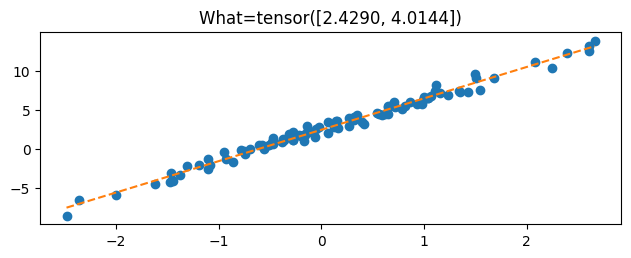

In [ ]:
plt.plot(x,y,'o')
plt.plot(x, X@What.data, '--')
plt.title(f'What={What.data.reshape(-1)}');

Step2의 수정 – loss_fn 이용

In [ ]:
What = torch.tensor([[-5.0], [10.0]], requires_grad=True)
loss_fn = torch.nn.MSELoss()
for epoc in range(30):
    yhat = X @ What
    loss = loss_fn(yhat, y)
    loss.backward()
    What.data = What.data - 0.1 * What.grad
    What.grad = None

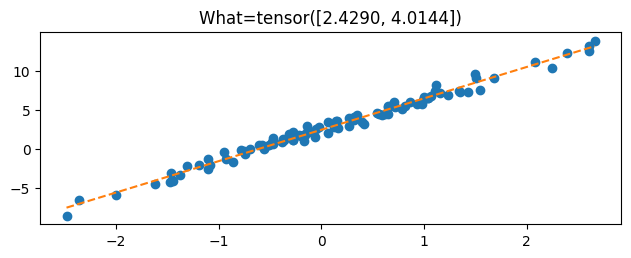

In [ ]:
plt.plot(x,y,'o')
plt.plot(x, X@What.data, '--')
plt.title(f'What={What.data.reshape(-1)}');

Step1의 수정 – net 이용

In [ ]:
# step1
net = torch.nn.Linear(
    in_features=2,
    out_features=1,
    bias=False
)
net.weight.data = torch.tensor([[-5.0, 10.0]])
# stwp2
loss_fn = torch.nn.MSELoss()
for epoc in range(30):
    yhat = net(X)
    loss = loss_fn(yhat, y)
    loss.backward()
    net.weight.data = net.weight.data - 0.1 * net.weight.grad
    net.weight.grad = None

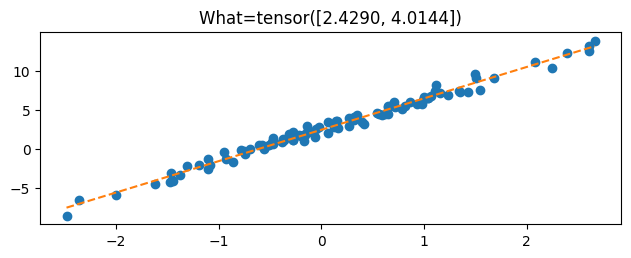

In [ ]:
plt.plot(x,y,'o')
plt.plot(x, X@What.data, '--')
plt.title(f'What={What.data.reshape(-1)}');

*** Step4의 수정 – optimizer의 이용 ***

In [ ]:
# step1을 위한 사전준비
net = torch.nn.Linear(
    in_features=2,
    out_features=1,
    bias=False
)
net.weight.data = torch.tensor([[-5.0, 10.0]])
loss_fn = torch.nn.MSELoss()
optimiz = torch.optim.SGD(net.parameters(), lr=0.1)
for epoc in range(30):
    yhat = net(X)
    loss = loss_fn(yhat, y)
    loss.backward()
    optimiz.step()
    optimiz.zero_grad()

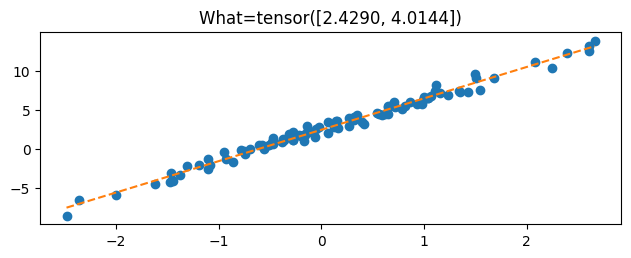

In [ ]:
plt.plot(x,y,'o')
plt.plot(x, X@What.data, '--')
plt.title(f'What={What.data.reshape(-1)}');

## Week_03

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### 파이토치식 코딩패턴 (2)

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
plt.rcParams['figure.figsize'] = (4.5, 3.0)

In [ ]:
torch.manual_seed(43052)
x,_ = torch.randn(100).sort()
eps = torch.randn(100)*0.5
X = torch.stack([torch.ones(100),x],axis=1)
W = torch.tensor([[2.5],[4.0]])
y = X@W + eps.reshape(100,1)
x = X[:,[1]]

##### bias의 사용

In [ ]:
net = torch.nn.Linear(
    in_features=1,
    out_features=1,
    bias=True
)
net.weight.data = torch.tensor([[10.0]])
net.bias.data = torch.tensor([-5.0])

loss_fn = torch.nn.MSELoss()

optimiz = torch.optim.SGD(net.parameters(), lr=0.1)

for epoc in range(30):
    yhat = net(x)
    loss = loss_fn(yhat, y)
    loss.backward()
    optimiz.step()
    optimiz.zero_grad()

In [ ]:
net.bias.data, net.weight.data

(tensor([2.4290]), tensor([[4.0144]]))

##### 로지스틱 모형

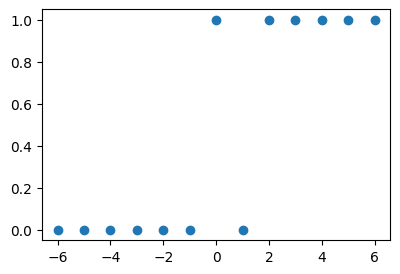

In [ ]:
x = torch.tensor([-6,-5,-4,-3,-2,-1, 0, 1, 2, 3, 4, 5, 6.0]).reshape(-1,1)
y = torch.tensor([ 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1]).reshape(-1,1)
plt.plot(x,y,'o')

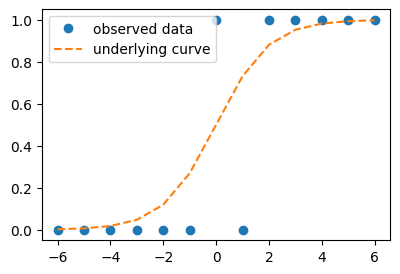

In [ ]:
plt.plot(x, y, 'o', label=r'observed data')
plt.plot(x, torch.exp(x) / (1 + torch.exp(x)), '--', label=r'underlying curve')
plt.legend()

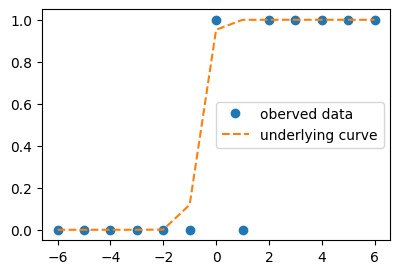

In [ ]:
plt.plot(x, y, 'o', label=r"oberved data")
plt.plot(x, torch.exp(5*x+3) / (1 + torch.exp(5*x+3)), '--', label=r"underlying curve")
plt.legend()

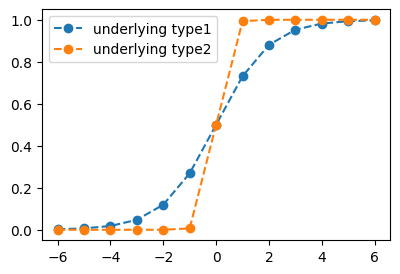

In [ ]:
plt.plot(x, torch.exp(x) / (torch.exp(x) + 1), 'o--', label=r"underlying type1")
plt.plot(x, torch.exp(5*x) / (1 + torch.exp(5*x)), 'o--', label=r"underlying type2")
plt.legend()

## Week_03_2

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [3]:
plt.rcParams['figure.figsize'] = (4.5, 3.0)

##### 로지스틱 모형 -> sig(linr(x))

In [4]:
torch.manual_seed(43052)
x = torch.linspace(-1, 1, 2000).reshape(2000, -1)
w0, w1 = -1, 5
prob = torch.exp(w0 + x * w1) / (1 + torch.exp(w0 + x * w1))
y = torch.bernoulli(prob)

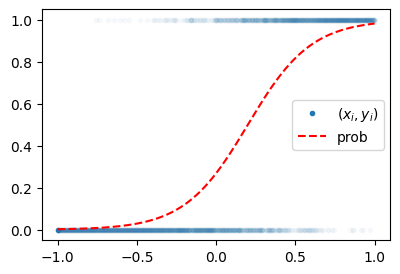

In [7]:
plt.plot(x, y, '.', alpha=0.03)
plt.plot(x[0], y[0], '.', label=r"$(x_i, y_i)$", color='C0')
plt.plot(x, prob, '--r', label=r'prob')
plt.legend()

#### Step1: net 설계 (모델링)

In [9]:
# 방법1 – l1, sigmoid
l1 = torch.nn.Linear(1, 1)
l1(x)

tensor([[ 0.0366],
        [ 0.0363],
        [ 0.0360],
        ...,
        [-0.6535],
        [-0.6538],
        [-0.6542]], grad_fn=<AddmmBackward0>)

In [10]:
l1.weight.data = torch.tensor([[-0.3]])
l1.bias.data = torch.tensor([-0.8])

In [11]:
def sigmoid(x):
    return torch.exp(x) / (1 + torch.exp(x))

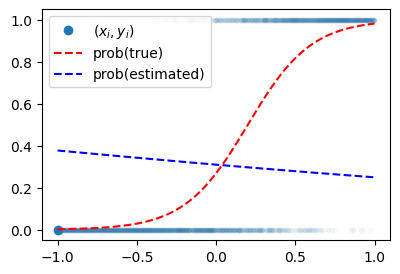

In [16]:
plt.plot(x, y ,'.', alpha=0.03)
plt.plot(x[0], y[0], 'o', label=r"$(x_i, y_i)$", color='C0')
plt.plot(x, prob, '--r', label=r"prob(true)")
plt.plot(x, sigmoid(l1(x)).data, '--b', label=r"prob(estimated)")
plt.legend()

In [17]:
# 방법2 – l1, a1
l1 = torch.nn.Linear(1, 1)
l1.weight.data = torch.tensor([[-0.3]])
l1.bias.data =  torch.tensor([-0.8])

In [18]:
a1 = torch.nn.Sigmoid()

In [19]:
sigmoid(l1(x)), a1(l1(x))

(tensor([[0.3775],
         [0.3775],
         [0.3774],
         ...,
         [0.2499],
         [0.2498],
         [0.2497]], grad_fn=<DivBackward0>),
 tensor([[0.3775],
         [0.3775],
         [0.3774],
         ...,
         [0.2499],
         [0.2498],
         [0.2497]], grad_fn=<SigmoidBackward0>))

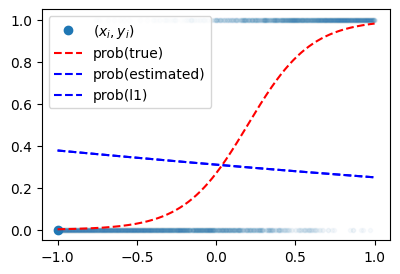

In [20]:
plt.plot(x, y ,'.', alpha=0.03)
plt.plot(x[0], y[0], 'o', label=r"$(x_i, y_i)$", color='C0')
plt.plot(x, prob, '--r', label=r"prob(true)")
plt.plot(x, sigmoid(l1(x)).data, '--b', label=r"prob(estimated)")
plt.plot(x, a1(l1(x)).data, '--b', label=r"prob(l1)")
plt.legend()

In [21]:
# 방법3 - l1, a1 만들고  -> net
l1 = torch.nn.Linear(1, 1)
l1.weight.data = torch.tensor([[-0.3]])
l1.bias.data = torch.tensor([-0.8])
a1 = torch.nn.Sigmoid()

In [22]:
net = torch.nn.Sequential(l1, a1)

In [24]:
net(x), a1(l1(x)), sigmoid(l1(x))

(tensor([[0.3775],
         [0.3775],
         [0.3774],
         ...,
         [0.2499],
         [0.2498],
         [0.2497]], grad_fn=<SigmoidBackward0>),
 tensor([[0.3775],
         [0.3775],
         [0.3774],
         ...,
         [0.2499],
         [0.2498],
         [0.2497]], grad_fn=<SigmoidBackward0>),
 tensor([[0.3775],
         [0.3775],
         [0.3774],
         ...,
         [0.2499],
         [0.2498],
         [0.2497]], grad_fn=<DivBackward0>))

In [25]:
net[0], net[1]

(Linear(in_features=1, out_features=1, bias=True), Sigmoid())

#### net 만들기

In [26]:
# 방법4 – net을 바로 만들기
net = torch.nn.Sequential(
    torch.nn.Linear(1, 1),
    torch.nn.Sigmoid()
)
net[0].weight.data = torch.tensor([[-0.3]])
net[0].bias.data = torch.tensor([-0.8])
yhat = net(x)

In [27]:
yhat

tensor([[0.3775],
        [0.3775],
        [0.3774],
        ...,
        [0.2499],
        [0.2498],
        [0.2497]], grad_fn=<SigmoidBackward0>)

In [28]:
#### 최종결과

In [29]:
net = torch.nn.Sequential(
    torch.nn.Linear(1, 1),
    torch.nn.Sigmoid()
)
l1, a1 = net
l1.weight.data = torch.tensor([[-0.3]])
l1.bias.data = torch.tensor([-0.8])
optimiz = torch.optim.SGD(net.parameters(), lr=0.25)
for i in range(100):
    yhat = net(x)
    loss = torch.mean((y - yhat)**2)
    loss.backward()
    optimiz.step()
    optimiz.zero_grad()

/tmp/ipython-input-2476929489.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


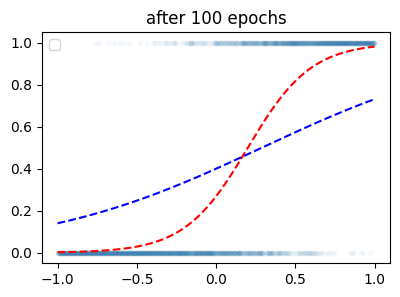

In [33]:
plt.plot(x, y, '.', alpha=0.03)
plt.plot(x, prob, '--r')
plt.plot(x, yhat.data, '--b')
plt.title('after 100 epochs')
plt.legend()

In [34]:
for i in range(4900):
    yhat = net(x)
    loss = torch.mean((y - yhat)**2)
    loss.backward()
    optimiz.step()
    optimiz.zero_grad()

/tmp/ipython-input-748464359.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


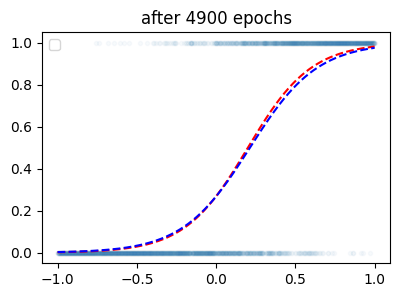

In [35]:
plt.plot(x, y, '.', alpha=0.03)
plt.plot(x, prob, '--r')
plt.plot(x, yhat.data, '--b')
plt.title('after 4900 epochs')
plt.legend()